In [4]:
import pandas as pd


df = pd.read_csv("./Datasets/reddit_depression_dataset.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470778 entries, 0 to 2470777
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    object 
 1   subreddit     object 
 2   title         object 
 3   body          object 
 4   upvotes       float64
 5   created_utc   float64
 6   num_comments  float64
 7   label         float64
dtypes: float64(4), object(4)
memory usage: 150.8+ MB


/var/folders/sl/008pmy7n24b0g1bkdpky5q900000gn/T/ipykernel_87352/1089056000.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Datasets/reddit_depression_dataset.csv")


In [5]:
col = ['subreddit', 'title', 'body', 'created_utc', 'label']

new_df = df[col]

new_df.head()

,subreddit,title,body,created_utc,label
0,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",1.405309e+09,0.0
1,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,1.410568e+09,0.0
2,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,1.416458e+09,0.0
3,DeepThoughts,"""I want to be like water. I want to slip throu...",NaN,1.416512e+09,0.0
4,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,1.416516e+09,0.0


In [6]:
# Check for missing values in 'label' column
print(df['label'].isna().sum())

# Option 1: Fill NaNs with a specific value (e.g., 0)
df['label'].fillna(0, inplace=True)

# Option 2: Drop rows with NaN values in 'label'
df.dropna(subset=['label'], inplace=True)

# Convert 'label' to int after handling missing values
df['label'] = df['label'].astype(int)

/var/folders/sl/008pmy7n24b0g1bkdpky5q900000gn/T/ipykernel_87352/2694964529.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].fillna(0, inplace=True)


106


In [7]:
df['text'] = df['title'] + ' ' + df['body']


# Split data into features (X) and target (y)
# Combine 'title' and 'body' into one column and handle NaN values
df['text'] = df['title'].fillna('') + ' ' + df['body'].fillna('')

# Check for any remaining NaN in the 'text' column (just in case)
df['text'].fillna('', inplace=True)

/var/folders/sl/008pmy7n24b0g1bkdpky5q900000gn/T/ipykernel_87352/2086827702.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].fillna('', inplace=True)


In [8]:
# Ensure 'label' has no missing values and is of integer type
df['label'].fillna(0, inplace=True)
df['label'] = df['label'].astype(int)

# Combine 'title' and 'body' into 'text'
df['text'] = df['title'].fillna('') + ' ' + df['body'].fillna('')

/var/folders/sl/008pmy7n24b0g1bkdpky5q900000gn/T/ipykernel_87352/525539520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].fillna(0, inplace=True)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # You can adjust 'max_features' as needed

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

In [10]:
from sklearn.model_selection import train_test_split

# Features and target variable
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
clf.fit(X_train, y_train)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x381f9fe90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x381eaca70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x381e8df40>},
                   random_state=42, scoring='f1')

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = random_search.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94    398074
           1       0.82      0.68      0.74     96082

    accuracy                           0.91    494156
   macro avg       0.87      0.82      0.84    494156
weighted avg       0.90      0.91      0.90    494156

Confusion Matrix:
 [[383624  14450]
 [ 31138  64944]]


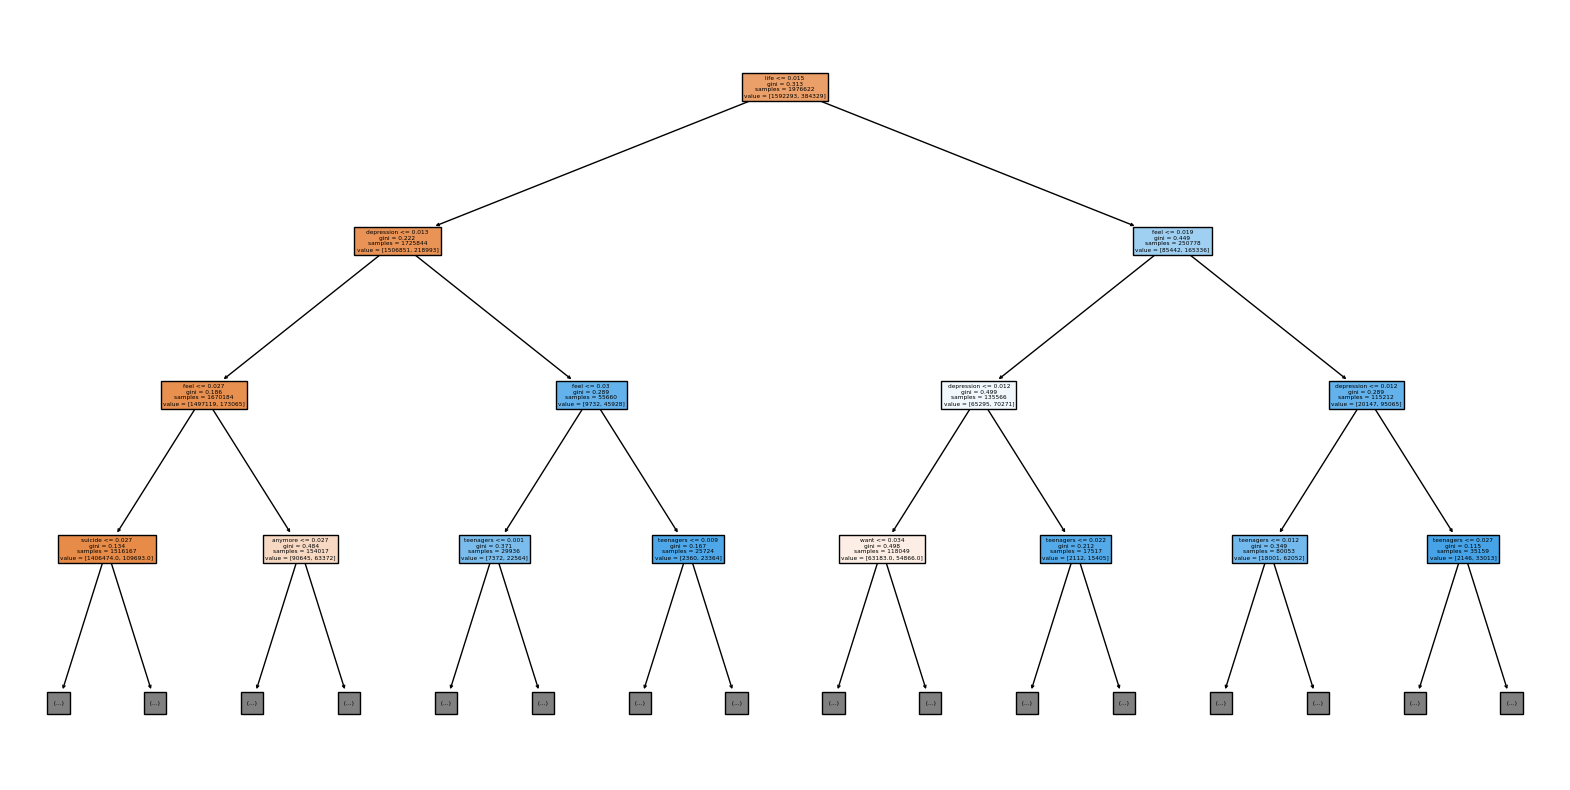

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, max_depth=3, feature_names=vectorizer.get_feature_names_out())
plt.show()

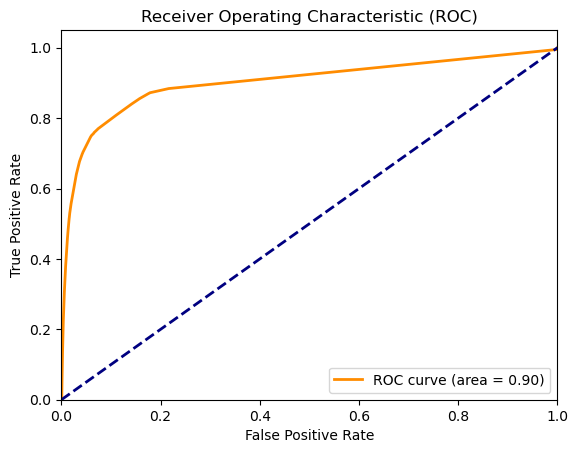

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# get the predicted probabilities
y_prob = random_search.predict_proba(X_test)[:, 1]

# get the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [3]:
# the training accuracy
train_score = random_search.best_estimator_.score(X_train, y_train)

# the testing accuracy
test_score = random_search.best_estimator_.score(X_test, y_test)

print(f'Training Accuracy: {train_score:.2f}')
print(f'Testing Accuracy: {test_score:.2f}')


NameError: name 'random_search' is not defined

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}


In [14]:
evals = [(dtrain, 'train'), (dtest, 'eval')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=10
)


[0]	train-auc:0.85833	eval-auc:0.85861
[10]	train-auc:0.91009	eval-auc:0.90976
[20]	train-auc:0.92185	eval-auc:0.92138
[30]	train-auc:0.93013	eval-auc:0.92942
[40]	train-auc:0.93603	eval-auc:0.93523
[50]	train-auc:0.94079	eval-auc:0.94002
[60]	train-auc:0.94408	eval-auc:0.94327
[70]	train-auc:0.94689	eval-auc:0.94595
[80]	train-auc:0.94899	eval-auc:0.94808
[90]	train-auc:0.95103	eval-auc:0.95002
[100]	train-auc:0.95267	eval-auc:0.95164
[110]	train-auc:0.95409	eval-auc:0.95300
[120]	train-auc:0.95535	eval-auc:0.95420
[130]	train-auc:0.95646	eval-auc:0.95528
[140]	train-auc:0.95749	eval-auc:0.95626
[150]	train-auc:0.95848	eval-auc:0.95717
[160]	train-auc:0.95930	eval-auc:0.95795
[170]	train-auc:0.96003	eval-auc:0.95862
[180]	train-auc:0.96075	eval-auc:0.95928
[190]	train-auc:0.96147	eval-auc:0.95993
[200]	train-auc:0.96209	eval-auc:0.96051
[210]	train-auc:0.96269	eval-auc:0.96110
[220]	train-auc:0.96322	eval-auc:0.96161
[230]	train-auc:0.96372	eval-auc:0.96204
[240]	train-auc:0.96425	eva

In [15]:
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

In [16]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    398074
           1       0.88      0.79      0.84     96082

    accuracy                           0.94    494156
   macro avg       0.92      0.88      0.90    494156
weighted avg       0.94      0.94      0.94    494156

Confusion Matrix:
 [[388044  10030]
 [ 19779  76303]]


In [17]:
bst.save_model("xgboost_model.json")

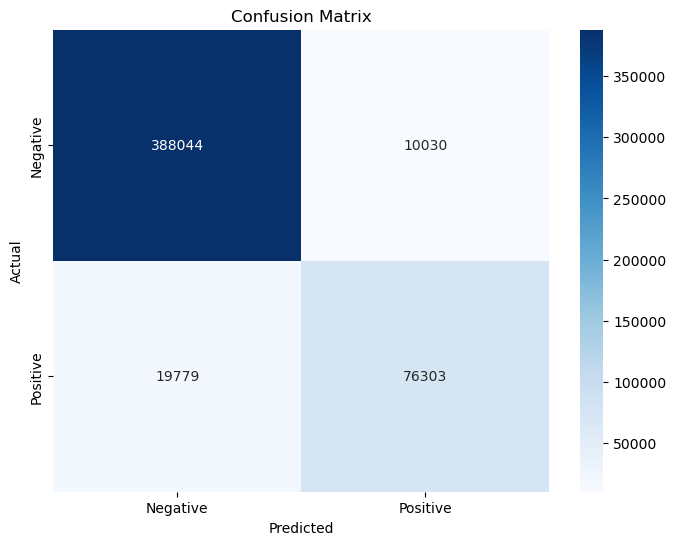

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


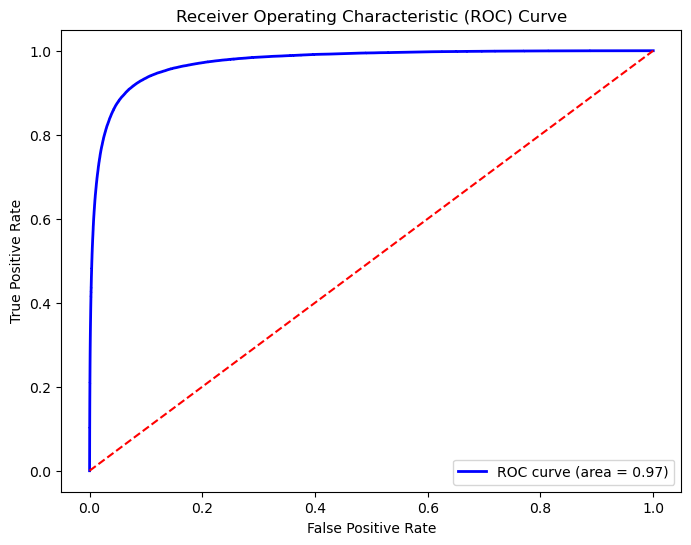

In [19]:
from sklearn.metrics import roc_curve, auc

# compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
